<a href="https://colab.research.google.com/github/hawkeyedatatsai/Maching-Learning-Mock-Regression/blob/main/Maching_Learning_Mock_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Your task is to use [this dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vTAQMDlyQdVuWy9le6OcM14fIZdQKg0s_PXhWUYIjUoB_rFpOz9Sv0K05ryiIQkTezghYtkLj6maFCW/pub?output=csv) to predict the fires using data from a smoke detector. The original dataset is from Kaggle.

This [link](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6#toc-dataset-7) has more description and gives us a data dict.

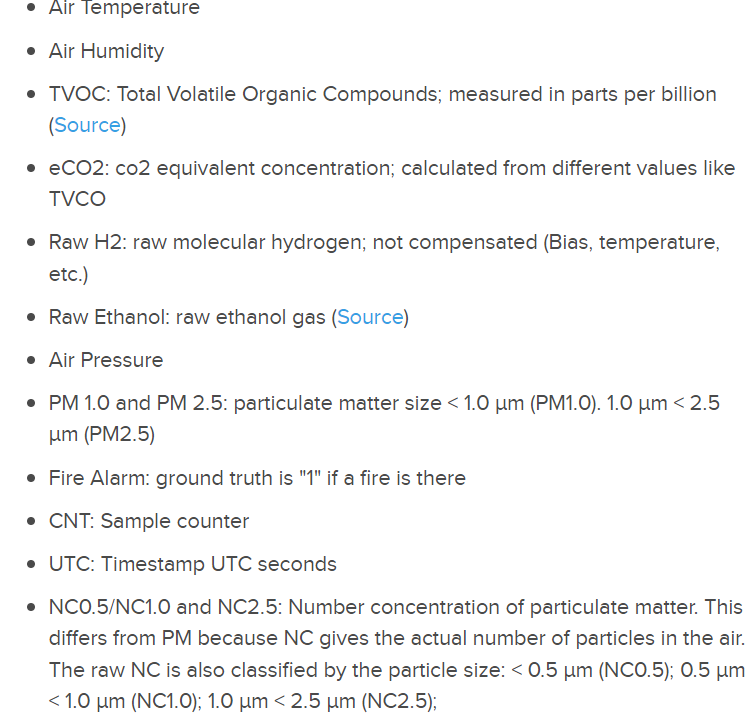

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score 
from IPython.core.display import clear_output
df = pd.read_csv("/content/2-smoke_detection_iot_BELT - smoke_detection_iot_BELT.csv")
print(df.shape)
print("\n")
print(df.info())
print("\n")
df.head()

(62633, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62633 entries, 0 to 62632
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62633 non-null  int64  
 1   UTC             62633 non-null  int64  
 2   Temperature[C]  43843 non-null  float64
 3   Humidity[%]     51985 non-null  float64
 4   eCO2[ppm]       62633 non-null  int64  
 5   Raw H2          47602 non-null  float64
 6   Raw Ethanol     62633 non-null  object 
 7   Pressure[hPa]   62633 non-null  object 
 8   PM1.0           62633 non-null  float64
 9   PM2.5           62633 non-null  float64
 10  NC0.5           62633 non-null  float64
 11  NC1.0           62633 non-null  float64
 12  NC2.5           62633 non-null  float64
 13  CNT             62633 non-null  int64  
 14  Fire Alarm      62633 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 7.2+ MB
None




,Unnamed: 0,UTC,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1655127852,12.235,43.30,400,13314.0,High,med,1.71,1.78,11.77,1.835,0.041,3544,0
1,1,1654777894,24.580,53.32,400,12889.0,Low,High,1.71,1.78,11.79,1.838,0.042,16551,1
2,2,1654785729,26.920,NaN,406,12989.0,Low,High,1.95,2.03,13.43,2.095,0.047,24386,1
3,3,1654773681,24.900,51.13,577,NaN,Low,High,2.31,2.40,15.91,2.481,0.056,12338,1
4,4,1654779348,26.390,50.65,400,12910.0,Low,High,1.72,1.79,11.85,1.848,0.042,18005,1


In [ ]:
# unnamed, utc and cnt because they are only marking and counting the data
# drop them to hv a better resolution of data
df = df.drop(["Unnamed: 0", 'UTC', "CNT"], axis=1)
df.describe()

,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,43843.000000,51985.000000,62633.000000,47602.000000,62633.000000,62633.000000,62633.000000,62633.000000,62633.000000,62633.000000
mean,15.952252,48.462203,670.008398,12943.810491,100.589507,184.458999,491.440068,203.576810,80.045255,0.714591
std,14.361454,9.368010,1905.840671,270.421548,922.502411,1976.258689,4265.560446,2214.685955,1083.357380,0.451612
min,-22.010000,-60.980000,400.000000,10668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.932000,47.530000,400.000000,12831.000000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.124000,50.160000,400.000000,12924.000000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.415000,53.240000,438.000000,13109.000000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,13803.000000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
df.describe(include="object" )

,Raw Ethanol,Pressure[hPa]
count,62633,62633
unique,8,6
top,Low,High
freq,27581,39303


#Prepare/clean the data for exploratory analysis purposes:


##Check for missing values. You should produce an output that shows the number of missing values for each feature.


In [ ]:
df.duplicated().sum()

541

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()
#no more duplicated rows anymore

0

In [ ]:
# Display the sum of missing values
df.isna().sum()
# result suggests missing values on both categorical and numerics column
# fire alarm, target to be, has no missing values

Temperature[C]    18252
Humidity[%]       10629
eCO2[ppm]             0
Raw H2            14970
Raw Ethanol           0
Pressure[hPa]         0
PM1.0                 0
PM2.5                 0
NC0.5                 0
NC1.0                 0
NC2.5                 0
Fire Alarm            0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100
# not going to drop columns since all are not significantly missing values

Temperature[C]    29.395091
Humidity[%]       17.118147
eCO2[ppm]          0.000000
Raw H2            24.109386
Raw Ethanol        0.000000
Pressure[hPa]      0.000000
PM1.0              0.000000
PM2.5              0.000000
NC0.5              0.000000
NC1.0              0.000000
NC2.5              0.000000
Fire Alarm         0.000000
dtype: float64

##For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).

##Write a justification of your strategy for imputing missing values.

##Make sure you avoid any data leakage when you impute values.


##Ensure data types match the data types listed in the data dictionary (if given).


##Check for and address any inconsistent values in categorical columns.

In [ ]:
# check for inconsistent values in categorical columns
for col in list(df.select_dtypes(include='object')):
  print(col)
  print(df[col].value_counts())
  print()

Raw Ethanol
Low         27297
Medium      13123
low          7418
High         6928
medium       3615
high         1889
Very Low     1415
very low      407
Name: Raw Ethanol, dtype: int64

Pressure[hPa]
High    38877
high    10658
Med      8949
med      2454
Low       899
low       255
Name: Pressure[hPa], dtype: int64



In [ ]:
df['Raw Ethanol'] = df['Raw Ethanol'].replace({'low': 'Low', 'medium': 'Medium', 'high': 'High', 'very low': 'Very Low'})
df['Raw Ethanol'].value_counts()

Low         34715
Medium      16738
High         8817
Very Low     1822
Name: Raw Ethanol, dtype: int64

In [ ]:
df['Pressure[hPa]'] = df['Pressure[hPa]'].replace({'low': 'Low', 'med': 'Med', 'high': 'High'})
df['Pressure[hPa]'].value_counts()

High    49535
Med     11403
Low      1154
Name: Pressure[hPa], dtype: int64

In [ ]:
# fix inconsistent values in categorical columns 
# cehck if it works
df = df.apply(lambda x: x.lower() if type(x) == str else x)
for col in list(df.select_dtypes(include='object')):
  print(col)
  print(df[col].value_counts())
  print()

Raw Ethanol
Low         27297
Medium      13123
low          7418
High         6928
medium       3615
high         1889
Very Low     1415
very low      407
Name: Raw Ethanol, dtype: int64

Pressure[hPa]
High    38877
high    10658
Med      8949
med      2454
Low       899
low       255
Name: Pressure[hPa], dtype: int64



##Check for and address any impossible values in numeric columns.

In [ ]:
df.describe()

,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,43840.000000,51463.000000,62092.000000,47122.000000,62092.000000,62092.000000,62092.000000,62092.000000,62092.000000,62092.000000
mean,15.951867,48.451543,670.986810,12943.677539,100.989549,185.209547,493.351898,204.406714,80.380054,0.714553
std,14.361860,9.385650,1907.817448,270.692835,924.378340,1981.012373,4274.191346,2220.091721,1086.477573,0.451631
min,-22.010000,-60.980000,400.000000,10668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.928250,47.530000,400.000000,12831.000000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.123000,50.150000,400.000000,12924.000000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.418750,53.240000,438.000000,13109.000000,2.090000,2.180000,14.410000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,13803.000000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
#what caught my eyes is that min Humidity is negative. Based on the list of different scenarios which are captured
#no way theres  negative Humidity. plan to drop them if i see any
df.drop(df.loc[df["Humidity[%]"] <= 0].index, inplace=True)
df.describe()

,Temperature[C],Humidity[%],eCO2[ppm],Raw H2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,43790.000000,51413.000000,62042.000000,47072.000000,62042.000000,62042.000000,62042.000000,62042.000000,62042.000000,62042.000000
mean,15.952587,48.547654,671.175800,12943.654997,101.069613,185.357431,493.740382,204.570023,80.444799,0.714484
std,14.364885,8.868620,1908.573409,270.787914,924.746448,1981.803627,4275.891407,2220.978692,1086.912896,0.451664
min,-22.010000,10.740000,400.000000,10668.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.934500,47.540000,400.000000,12831.000000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.124500,50.160000,400.000000,12924.000000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.424750,53.250000,438.000000,13109.000000,2.090000,2.180000,14.410000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,13803.000000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


#Explore the data:


##Create at least two different types of exploratory visualizations.


##Write one to two sentences about what each visualization tells you about the data.

#Prepare the data appropriately for modeling:


##Implement a preprocessing pipeline to avoid data leakage.Scale the data if your model requires it.


##Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).

#Create and compare at least 2 different models:


##Put your preprocessing and models into pipelines.


##For each model type, create a default version of each model with default hyperparameters.



##Create additional versions of each model type where you tune hyperparameters for each model.


##Use appropriate metrics to evaluate each model.

#Choose one final model:
Write a justification of your choice of the final model.